**Prediction Task:Given a new credit card transaction (its numerical features), predict whether it is likely fraudulent (1) or legitimate (0).**

In [12]:
!pip install -q pandas numpy scikit-learn tensorflow matplotlib

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/creditcard_sample.csv")
print(df.shape)
print(df.columns.tolist())
print(df['Class'].value_counts())
df.head()


(113923, 32)
['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Class
0    113681
1       242
Name: count, dtype: int64


,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2378,1930.0,-1.876775,1.502617,-0.180194,0.977354,-0.061567,0.494801,-0.451972,1.305936,...,0.219747,0.306065,-0.209750,-1.313575,0.331951,-0.050504,-0.404765,-0.254048,19.00,0
1,273297,165533.0,1.940689,-0.608943,-0.403702,0.299854,-0.650623,-0.017552,-0.775653,0.142058,...,0.187357,0.663394,0.083087,-0.447831,-0.273218,0.578268,-0.030590,-0.059487,28.75,0
2,227812,145231.0,2.038942,-0.107163,-1.206941,0.209917,0.121556,-0.658609,0.095344,-0.177717,...,-0.257896,-0.640907,0.272963,-0.399733,-0.269816,0.201406,-0.074278,-0.072822,5.99,0
3,156267,107699.0,-0.584880,0.802126,2.168415,-0.087223,-0.149201,-0.266862,0.265699,0.053765,...,-0.270800,-0.572138,-0.232919,-0.229651,0.237180,-0.687225,0.074801,0.072904,11.27,0
4,174712,122034.0,2.021069,0.161557,-1.589579,0.338791,0.439508,-0.648810,0.128491,-0.137285,...,-0.293840,-0.745270,0.343675,0.687123,-0.291434,0.140543,-0.061957,-0.037519,0.89,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113923 entries, 0 to 113922
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113923 non-null  int64  
 1   Time        113923 non-null  float64
 2   V1          113923 non-null  float64
 3   V2          113923 non-null  float64
 4   V3          113923 non-null  float64
 5   V4          113923 non-null  float64
 6   V5          113923 non-null  float64
 7   V6          113923 non-null  float64
 8   V7          113923 non-null  float64
 9   V8          113923 non-null  float64
 10  V9          113923 non-null  float64
 11  V10         113923 non-null  float64
 12  V11         113923 non-null  float64
 13  V12         113923 non-null  float64
 14  V13         113923 non-null  float64
 15  V14         113923 non-null  float64
 16  V15         113923 non-null  float64
 17  V16         113923 non-null  float64
 18  V17         113923 non-null  float64
 19  V1

In [20]:
from sklearn.preprocessing import StandardScaler

df = df.drop(columns=['Unnamed: 0', 'Time'])
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
X = df.drop(columns=['Class']).values
y = df['Class'].values

print(X.shape, y.shape)
np.bincount(y)

(113923, 29) (113923,)


array([113681,    242])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_norm = X_train[y_train == 0]
X_test_norm = X_test[y_test == 0]
X_test_fraud = X_test[y_test == 1]

print(X_train.shape, X_test.shape)
print(X_train_norm.shape, X_test_norm.shape, X_test_fraud.shape)


(91138, 29) (22785, 29)
(90944, 29) (22737, 29) (48, 29)


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

input_dim = X_train_norm.shape[1]
inp = keras.Input(shape=(input_dim,))
x = layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(1e-5))(inp)
x = layers.Dense(8, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
out = layers.Dense(input_dim, activation="linear")(x)
ae = keras.Model(inp, out)
ae.compile(optimizer=keras.optimizers.Adam(1e-3), loss="mse")

history = ae.fit(
    X_train_norm,
    X_train_norm,
    epochs=8,
    batch_size=256,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)


Epoch 1/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1263 - val_loss: 0.7932
Epoch 2/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7430 - val_loss: 0.5819
Epoch 3/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5679 - val_loss: 0.4928
Epoch 4/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4754 - val_loss: 0.4405
Epoch 5/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4316 - val_loss: 0.4098
Epoch 6/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4082 - val_loss: 0.3915
Epoch 7/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3871 - val_loss: 0.3774
Epoch 8/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3763 - val_loss: 0.3677


In [24]:
# Now let’s get reconstruction errors for normal vs fraud in test data to see separation.

reconstructions_norm = ae.predict(X_test_norm)
reconstructions_fraud = ae.predict(X_test_fraud)

mse_norm = np.mean(np.square(X_test_norm - reconstructions_norm), axis=1)
mse_fraud = np.mean(np.square(X_test_fraud - reconstructions_fraud), axis=1)

print("Normal mean error:", mse_norm.mean())
print("Fraud mean error:", mse_fraud.mean())


711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Normal mean error: 0.3636520651678425
Fraud mean error: 24.41475705612308


Normal transactions → mean reconstruction error ≈ 0.36

Fraudulent transactions → mean reconstruction error ≈ 24.4

👉 That means the autoencoder reconstructs normal data well (low error) but fails to reconstruct fraud (high error).


Now we can set a threshold:

If error ≤ threshold → predict normal (0)

If error > threshold → predict fraud (1)

In [25]:
from sklearn.metrics import precision_recall_curve, f1_score

reconstructions = ae.predict(X_test)
mse = np.mean(np.square(X_test - reconstructions), axis=1)

precisions, recalls, thresholds = precision_recall_curve(y_test, mse)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)
print("Best F1 Score:", f1_scores.max())


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best Threshold: 8.224994805723277
Best F1 Score: 0.5416661666671282


Now your model automatically found the best threshold ≈ 8.22 with best F1 ≈ 0.54.

In [26]:
# Evaluate with confusion matrix and ROC/PR AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score

y_pred = (mse > best_threshold).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, mse))
print("PR-AUC:", average_precision_score(y_test, mse))


[[22715    22]
 [   23    25]]
              precision    recall  f1-score   support

           0     0.9990    0.9990    0.9990     22737
           1     0.5319    0.5208    0.5263        48

    accuracy                         0.9980     22785
   macro avg     0.7655    0.7599    0.7627     22785
weighted avg     0.9980    0.9980    0.9980     22785

ROC-AUC: 0.9890569336324053
PR-AUC: 0.5953995062684984


22715 → True negatives (correctly predicted normal)

22 → False positives (normal flagged as fraud)

23 → False negatives (fraud missed)

25 → True positives (fraud correctly detected)

The autoencoder is very good at recognizing normal transactions.

It does detect frauds, but recall is only ~52% — meaning it misses about half the frauds.

This is common in fraud detection: you can tune the threshold depending on whether you prefer catching more fraud (higher recall) or fewer false alarms (higher precision).

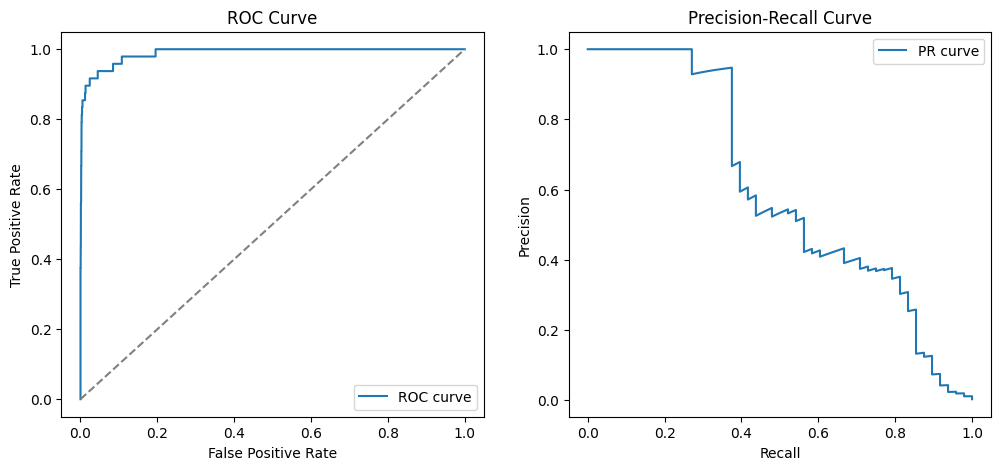

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, _ = roc_curve(y_test, mse)
precisions, recalls, _ = precision_recall_curve(y_test, mse)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(recalls, precisions, label="PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.show()


The ROC curve is almost hugging the top-left → confirms the model separates normal vs fraud well overall (AUC ~0.99).

The PR curve is not as high → expected in fraud detection, because the fraud class is so rare.

In [28]:
import pickle

def predict_fraud(df_new, model, scaler, threshold):
    df_new = df_new.drop(columns=['Unnamed: 0', 'Time'], errors='ignore')
    df_new['Amount'] = scaler.transform(df_new[['Amount']])
    X_new = df_new.drop(columns=['Class'], errors='ignore').values
    recon = model.predict(X_new)
    mse = np.mean(np.square(X_new - recon), axis=1)
    preds = (mse > threshold).astype(int)
    return preds, mse


In [29]:
sample = df.sample(5, random_state=42)   # take 5 random transactions
preds, scores = predict_fraud(sample, ae, scaler, best_threshold)

print(sample[['Amount', 'Class']])
print("Predictions:", preds)
print("Errors:", scores)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
         Amount  Class
27561 -0.256263      0
89107  0.230982      0
2662   0.292851      0
45774  0.004308      0
81729  0.049794      0
Predictions: [0 0 0 0 0]
Errors: [0.25312235 0.16836084 4.57402653 0.39019586 0.27904971]


Perfect you just did your first fraud predictions on new data!

All 5 samples were Class 0 (normal) → model also predicted [0 0 0 0 0].

Errors are all low (< 8.22 threshold) → so classified as normal.

If you feed it a fraud transaction, you’ll see a much higher error (>> 8.22) and it will predict 1.

In [31]:
import pickle

ae.save("models/fraud_autoencoder.h5")

with open("models/fraud_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("models/fraud_threshold.txt", "w") as f:
    f.write(str(best_threshold))



In [34]:
ae.save("models/fraud_autoencoder.keras")

from tensorflow.keras.models import load_model
loaded_model = load_model("models/fraud_autoencoder.keras")


In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers, losses

loaded_model = load_model("models/fraud_autoencoder.h5", compile=False)
loaded_model.compile(optimizer=optimizers.Adam(1e-3), loss=losses.MeanSquaredError())


In [36]:
import pickle, numpy as np

with open("models/fraud_scaler.pkl","rb") as f:
    loaded_scaler = pickle.load(f)
with open("models/fraud_threshold.txt","r") as f:
    loaded_threshold = float(f.read())

recon = loaded_model.predict(X_test)
mse_loaded = np.mean(np.square(X_test - recon), axis=1)
(y_test == (mse_loaded > loaded_threshold).astype(int)).mean()


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


np.float64(0.9980250164581962)

In [40]:
test_df = pd.DataFrame(X_test, columns=df.drop(columns=['Class']).columns)
test_df['Class'] = y_test

sample = test_df.sample(10, random_state=1)   # pick 10 random test rows
preds, scores = predict_fraud(sample, loaded_model, loaded_scaler, loaded_threshold)

sample['fraud_score'] = scores
sample['is_fraud'] = preds
sample[['Amount','Class','fraud_score','is_fraud']]




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


,Amount,Class,fraud_score,is_fraud
16150,-0.301145,0,0.141889,0
10512,-0.325832,0,0.151016,0
20127,-0.202096,0,0.493820,0
1822,-0.297522,0,0.259096,0
5101,-0.331457,0,0.331791,0
16917,0.268730,0,0.218440,0
14326,-0.266795,0,0.998157,0
7494,1.454004,0,0.423335,0
5954,-0.332363,0,0.281266,0
19905,-0.317188,0,0.096386,0


In [45]:
new_df = pd.read_csv("/content/new_transactions.csv")

preds, scores = predict_fraud(new_df, loaded_model, loaded_scaler, loaded_threshold)

out = new_df.copy()
out['fraud_score'] = scores
out['is_fraud'] = preds

out.to_csv("predictions.csv", index=False)
out.head(15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,fraud_score,is_fraud
0,-2.561280,-3.569876,1.574779,-2.393478,1.726183,-1.680690,-2.059171,0.502083,-1.883353,0.809815,...,-0.375783,0.359071,0.594091,0.657435,-0.181299,-0.112933,0.098954,74.00,152.877353,1
1,-0.556124,1.532298,1.215524,0.141406,0.325974,-0.533048,0.432892,-0.987383,0.786738,-0.849577,...,-1.096573,0.047948,-0.065997,-0.073561,0.057642,0.263886,0.097807,4.49,1.327014,0
2,1.055224,-0.841109,-0.136485,-0.494300,-0.619118,-0.632461,-0.105590,-0.344353,-0.096634,0.353636,...,0.207187,-0.325495,0.015611,0.617489,-0.205207,-0.078457,0.021740,200.88,1113.776373,1
3,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,-4.458008,...,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,186.13,954.872125,1
4,-3.520883,-4.088436,-0.314490,2.798756,-4.072776,2.870090,4.916759,-0.815908,0.108571,-0.632336,...,0.271425,1.208343,0.069579,0.160941,-0.119679,0.348011,-0.004502,1541.85,64864.956541,1
5,-2.073411,-0.363452,2.227696,0.689432,-0.186702,-0.155875,-0.524638,0.783487,1.531872,-1.554240,...,0.232848,-0.062539,-0.038796,0.409944,-0.355953,-0.078900,-0.151653,105.28,302.584318,1
6,-0.585465,1.300289,2.392638,2.906421,0.189128,0.239249,0.340106,-0.002408,0.164439,0.022693,...,-0.266507,0.068025,0.553947,-0.585356,-0.166546,0.020496,0.160745,4.74,1.436473,0
7,2.068707,0.090636,-1.679916,0.450980,0.275556,-0.964637,0.117882,-0.185398,0.640449,-0.348157,...,-1.008199,0.365472,0.610862,-0.305820,0.168754,-0.069021,-0.031735,0.89,0.203748,0
8,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,3.431207,-3.875643,-6.868509,...,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886,0.00,23.176795,1
9,-2.343335,2.169380,-0.988811,-2.994807,0.220375,-0.807482,0.461978,0.861899,0.507848,0.035103,...,-0.952468,-0.088697,-1.052294,0.319712,0.442727,0.497897,0.321556,5.00,0.997625,0


In [46]:
out[['Amount','fraud_score','is_fraud']].head(15)


,Amount,fraud_score,is_fraud
0,74.00,152.877353,1
1,4.49,1.327014,0
2,200.88,1113.776373,1
3,186.13,954.872125,1
4,1541.85,64864.956541,1
5,105.28,302.584318,1
6,4.74,1.436473,0
7,0.89,0.203748,0
8,0.00,23.176795,1
9,5.00,0.997625,0


In [47]:
out.to_csv("predictions.csv", index=False)

from google.colab import files
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>